# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Submission

To submit your homework, take the following steps.

1. Save and commit this notebook.
2. Push your changes to GitHub.
3. Confirm that your changes are visible in GitHub.
4. Delete the codespace to avoid wasting your free quota.

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [5]:
import math
import sys

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Titanic disaster](https://www.kaggle.com/c/titanic/data) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/titanic))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [7]:
# YOUR CODE HERE
df=pd.read_csv('560_bodyfat.tsv.gz', sep='\t', compression= 'gzip')
df.dropna().head(10)

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
0,1.0708,23.0,154.25,67.75,36.200001,93.099998,85.199997,94.500000,59.000000,37.299999,21.900000,32.000000,27.400000,17.100000,12.300000
1,1.0853,22.0,173.25,72.25,38.500000,93.599998,83.000000,98.699997,58.700001,37.299999,23.400000,30.500000,28.900000,18.200001,6.100000
2,1.0414,22.0,154.00,66.25,34.000000,95.800003,87.900002,99.199997,59.599998,38.900002,24.000000,28.799999,25.200001,16.600000,25.299999
3,1.0751,26.0,184.75,72.25,37.400002,101.800003,86.400002,101.199997,60.099998,37.299999,22.799999,32.400002,29.400000,18.200001,10.400000
4,1.0340,24.0,184.25,71.25,34.400002,97.300003,100.000000,101.900002,63.200001,42.200001,24.000000,32.200001,27.700001,17.700001,28.700001
5,1.0502,24.0,210.25,74.75,39.000000,104.500000,94.400002,107.800003,66.000000,42.000000,25.600000,35.700001,30.600000,18.799999,20.900000
6,1.0549,26.0,181.00,69.75,36.400002,105.099998,90.699997,100.300003,58.400002,38.299999,22.900000,31.900000,27.799999,17.700001,19.200001
7,1.0704,25.0,176.00,72.50,37.799999,99.599998,88.500000,97.099998,60.000000,39.400002,23.200001,30.500000,29.000000,18.799999,12.400000
8,1.0900,25.0,191.00,74.00,38.099998,100.900002,82.500000,99.900002,62.900002,38.299999,23.799999,35.900002,31.100000,18.200001,4.100000
9,1.0722,23.0,198.25,73.50,42.099998,99.599998,88.599998,104.099998,63.099998,41.700001,25.000000,35.599998,30.000000,19.200001,11.700000


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

- Density: The mass per unit volume of a person''s body. Typically used to compute body fat.
- Age: the age range is from 22-81
- Weight: weight is measured in pounds (Ibs). ranges from 118.5-363.1
- Height: measured from head to toes and calculated in inches
- Neck: measures the circumference of the neck in centimeters(cm)
- Chest: Measures the circumference of the chest in centimeters(cm)
- Abdomen: measures the circumference of the abdomen in centimeters(cm)
- Hip: measures the circumference of the widest part of the hips in centimeters(cm)
- Thigh: Measures the circumference of the thigh in centimeters(cm)
- Knee: Measures the circumference of the knee in centimeters(cm)
- nkle: Measures the circumference of the ankle in centimeters(cm)
- Biceps:Measures the circumference of the biceps when the arm is extended in centimeters(cm)
- Forearm: Measures the circumference of the Forearm in centimeters(cm)
- Wrist: Measures the circumference of the wrist in centimeters(cm)
- target: measures the body's fat percentage

In [8]:
# YOUR CODE HERE
df.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992064,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411804,1.694894,3.021274,2.020691,0.933585,8.368740
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300003,69.400002,85.000000,47.200001,33.000000,19.100000,24.799999,21.000000,15.800000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,36.400002,94.350000,84.574999,95.500000,56.000000,36.975000,22.000000,30.200001,27.299999,17.600000,12.475000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.649998,90.950001,99.300003,59.000000,38.500000,22.799999,32.049999,28.700001,18.299999,19.200001
75%,1.070400,54.000000,197.000000,72.250000,39.425001,105.375002,99.324997,103.525000,62.349999,39.925001,24.000000,34.325000,30.000000,18.799999,25.299999
max,1.108900,81.000000,363.149994,77.750000,51.200001,136.199997,148.100006,147.699997,87.300003,49.099998,33.900002,45.000000,34.900002,21.400000,47.500000


YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

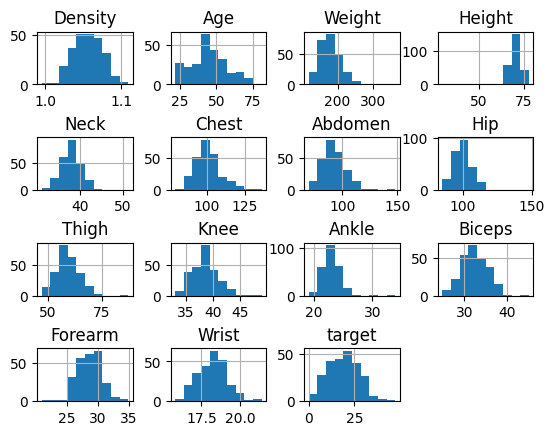

In [9]:
# YOUR CODE HERE
df.hist()
plt.subplots_adjust(wspace=.4, hspace=1)
#Height seems to have an outlier based of the histogram. 

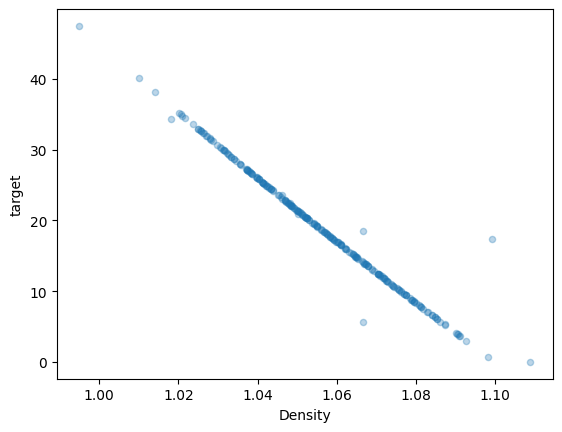

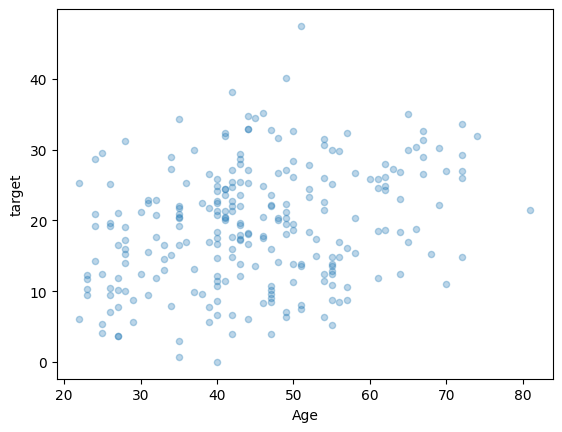

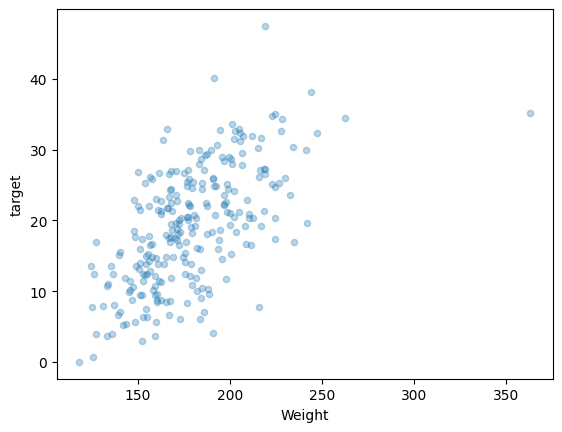

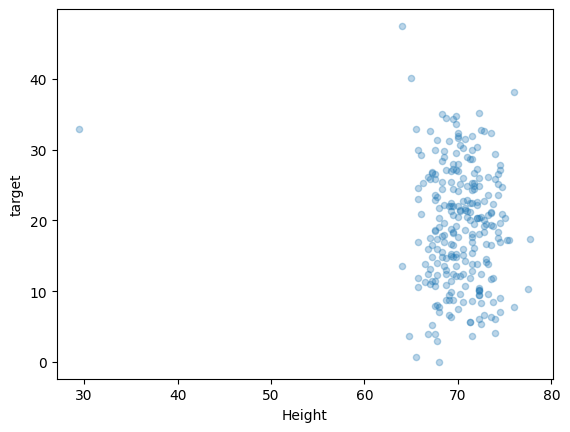

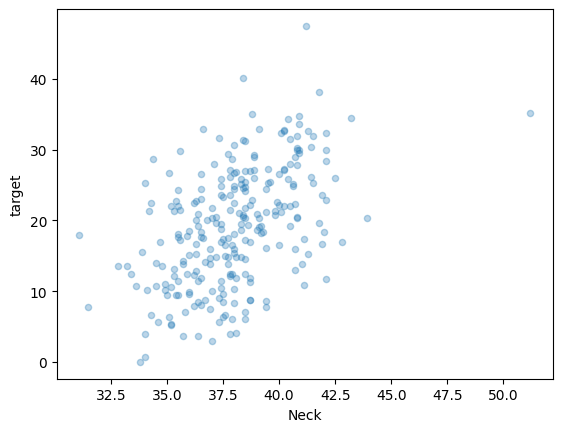

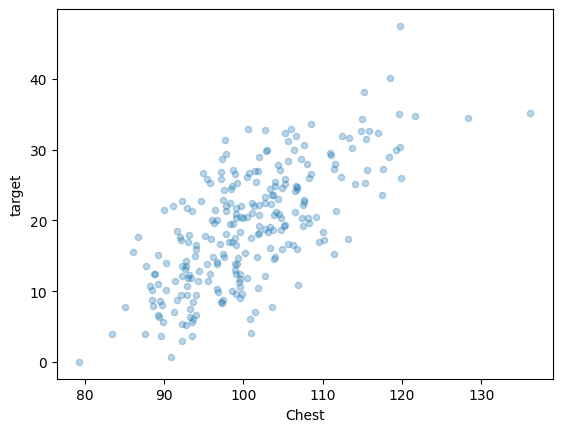

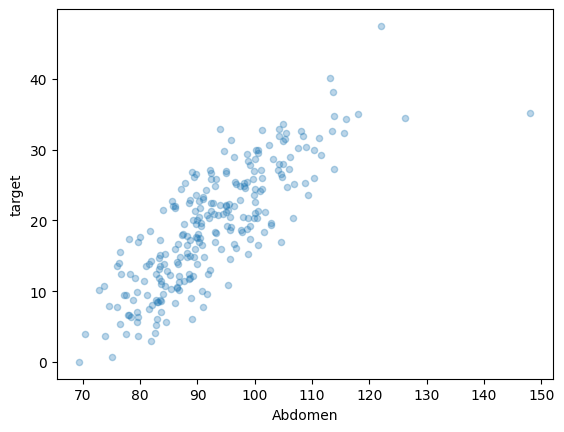

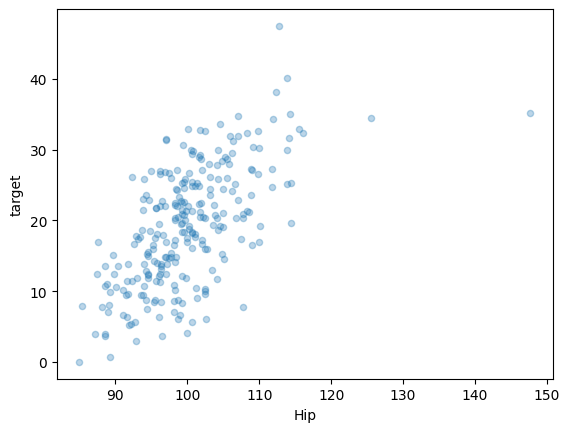

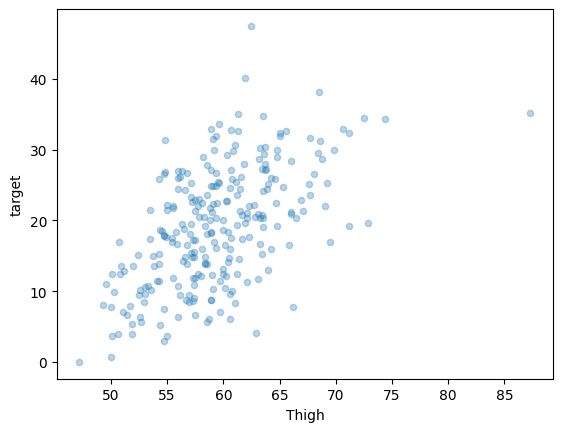

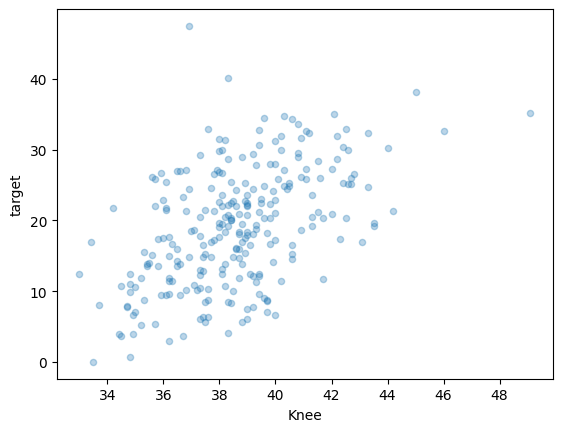

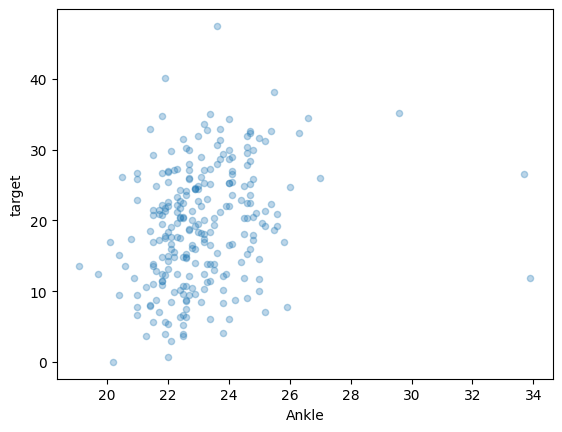

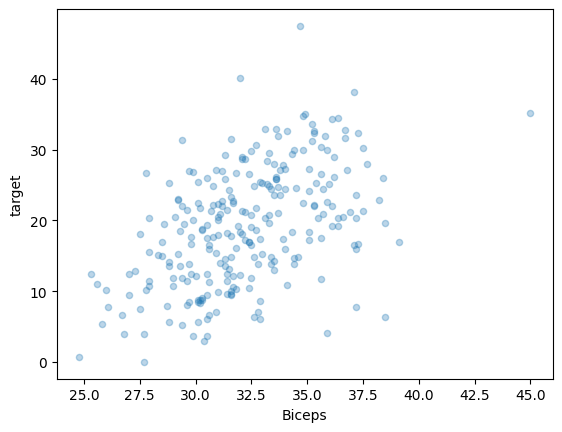

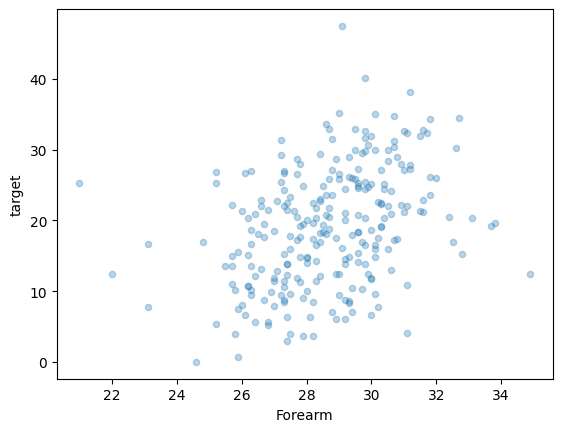

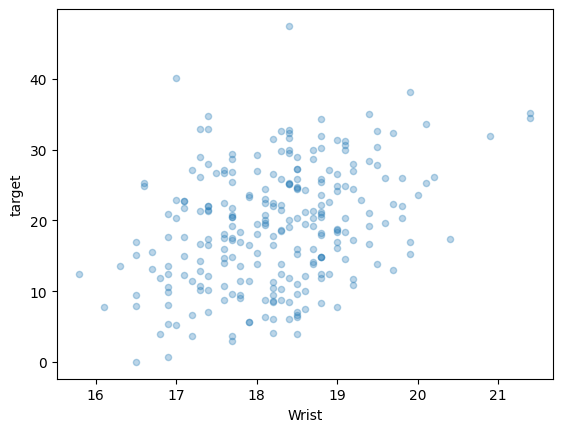

In [10]:
for c in df.columns:
    if c== "target":
        continue
    df.plot.scatter(c, 'target', alpha=.3)
    

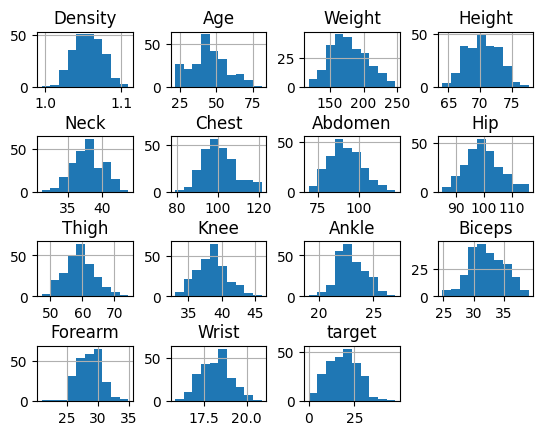

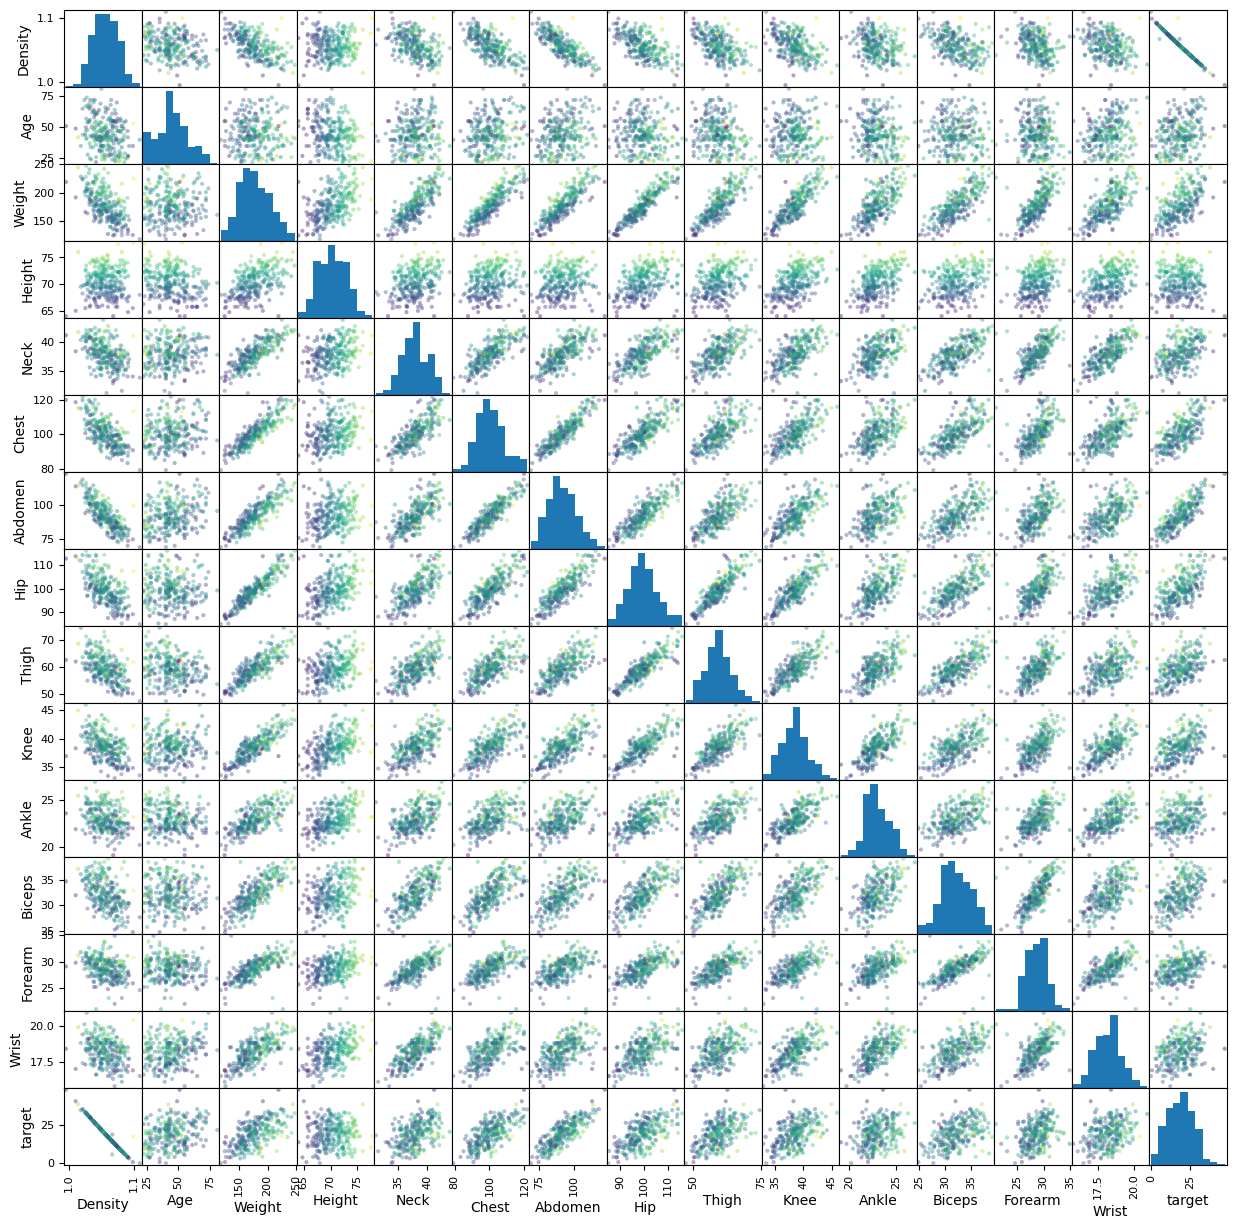

In [11]:
# given the result, getting rid of data points that are 3 standard deviations from the mean seems reasonable. 
# The individual that is around 30 inches is likey a child that got into the dataset.
# there seems to be an idividual that has big ankles that may skew the data
#An Individual has abnormal hips which should be removed

c_list= ['Hip', 'Ankle', 'Height']
for c in c_list:
    mean = np.mean(df[c])
    std = np.std(df[c]) * 3
    threshold_up = mean + std
    threshold_dn = mean - std
    df = df[(df[c] > threshold_dn) & (df[c] < threshold_up)]

df.hist()
plt.subplots_adjust(wspace=.4, hspace=.9)

_=pd.plotting.scatter_matrix(df, alpha=0.4, figsize=(15, 15), diagonal='hist', c=df['Height'])


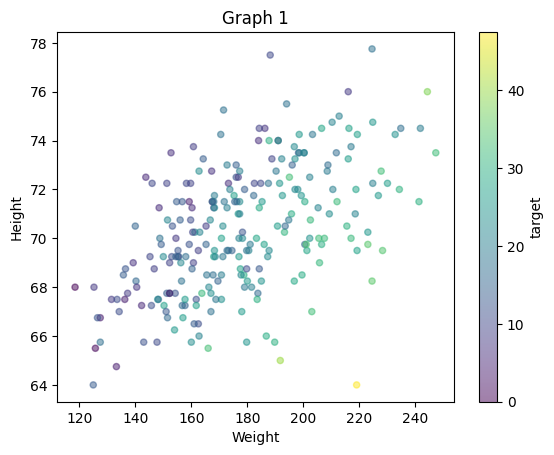

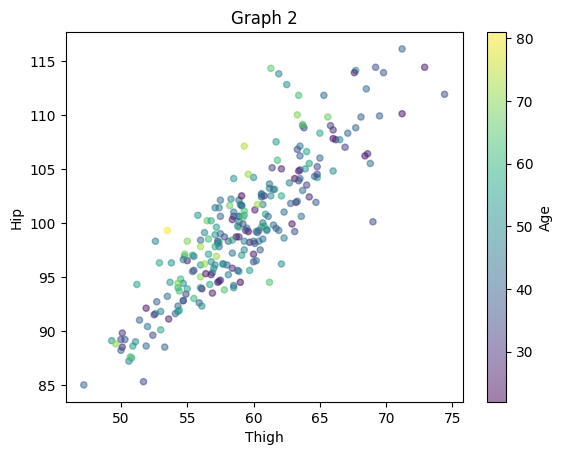

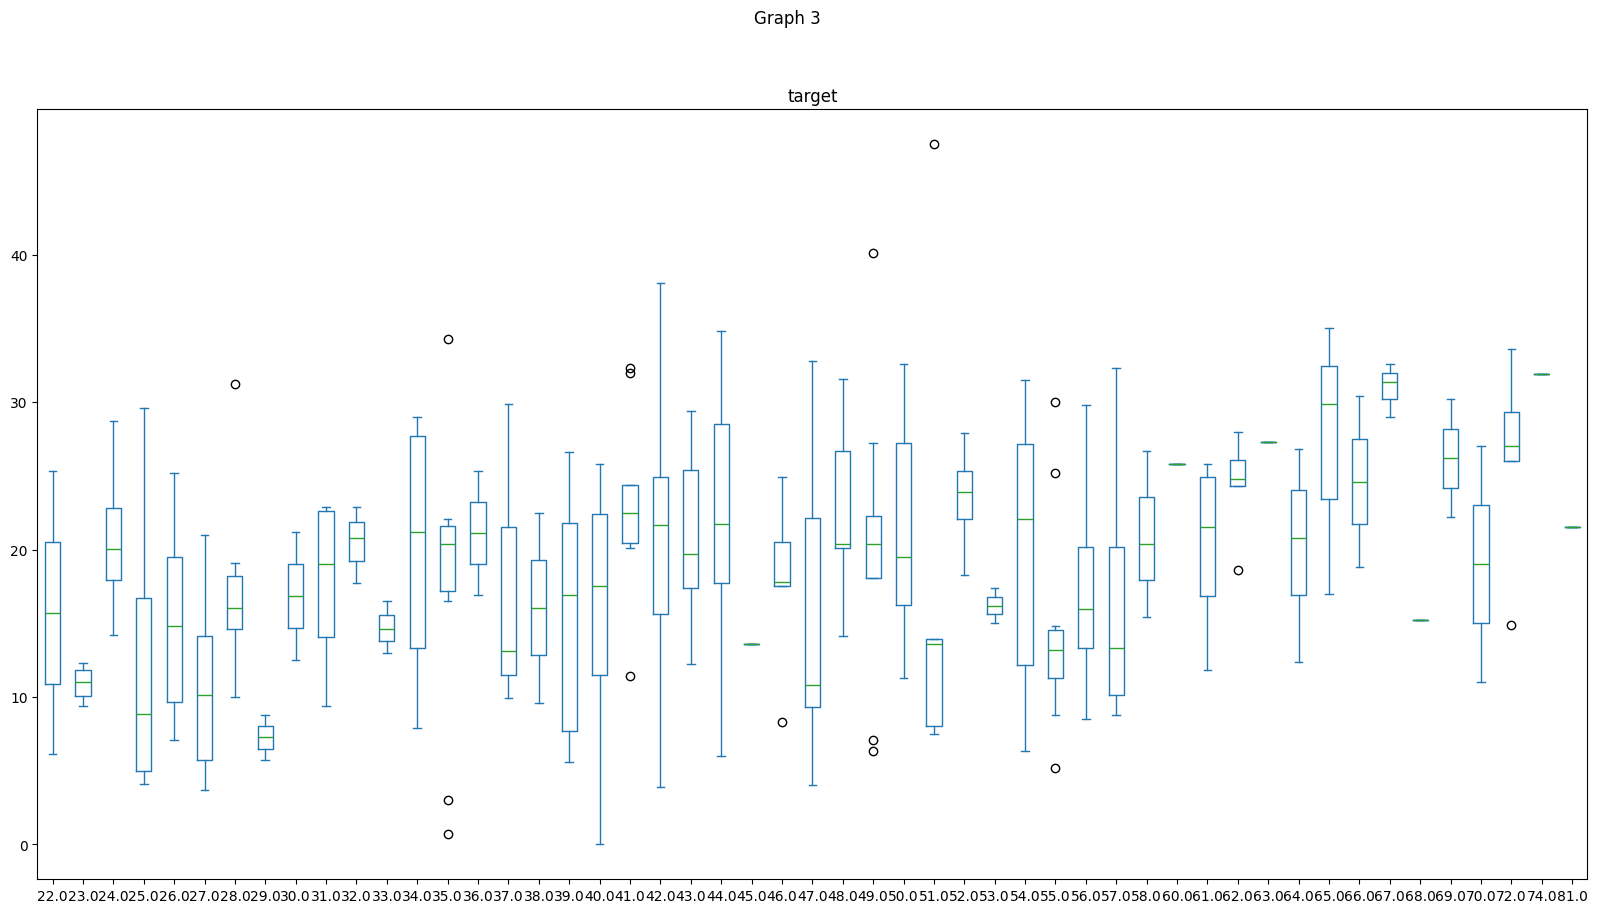

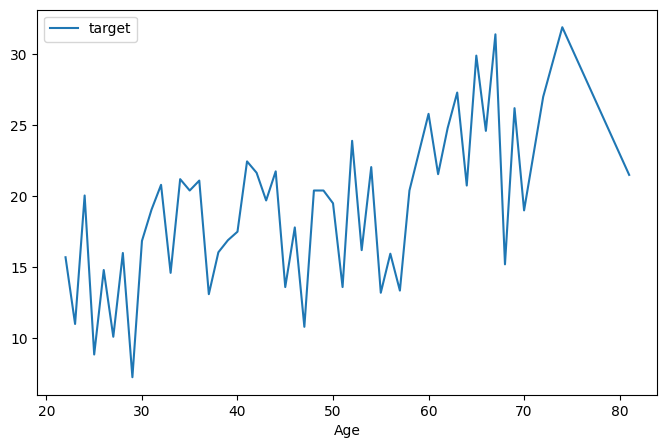

In [12]:
_=df.plot.scatter('Weight', 'Height', c='target', title= 'Graph 1', alpha=.5)#graph 1
_=df.plot.scatter('Thigh', 'Hip', c='Age', title='Graph 2', alpha=.5)#graph 2 

df_rounded= df.copy()# graph 3
df_rounded['Age']=df_rounded['Age'].round(1)
_=df_rounded.plot.box(column='target', by='Age', figsize=(20,10), title= 'Graph 3')

_=df_rounded[['Age', 'target']].groupby('Age').median().plot(figsize=(8,5))

- The first graph has demonstrates the relationship between height, weight, and the target variable. This graph caught my attention because height and weight have a positive linear relationship but when target variable is added as the 3rd dimension, there seems to be 3 clusters. Individuals with low body fat percentage are more taller (holding weight constant) than individuals with higher fat percentage. There seems to be an advantage of being taller 

- The second graph shows the relationship between hip, thigh, and age. The second graph is interesting because hip and thigh have a positive linear relationsip and adding age as the 3rd dimension shows an interesting finding. It appears that as individuals get older, they don't neccessarily have big hips or thighs. One potential reason is that as individuals get older, they lose muscle mass which would mean that their hip and/or thigh would get smaller (possiibly could be replaced with fat)

- The third graph is a boxplot of the target variable and age. This boxplot is interesting because it shows younger individuals tend to have lower body fat percentages and as they get reach 30, it starts to increase. It then stays stagnant with high variability of the medians. Then starts to increase again when age is about 60. This makes sense because younger individuals have more energy and able to build muscle relatively easier which would lower their body fat percentages. As individuals get older it may become difficult to retian the muscle mass which would mean that it could turn into body fat. It could explain why the elderly have higher body fat percentages.YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [13]:
df.corr()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
Density,1.000000,-0.275883,-0.595308,0.031260,-0.467105,-0.678691,-0.810816,-0.615729,-0.539549,-0.481911,-0.286405,-0.472028,-0.346725,-0.303579,-0.987235
Age,-0.275883,1.000000,-0.013107,-0.236434,0.126926,0.189059,0.250722,-0.056845,-0.216539,0.019869,-0.161812,-0.044811,-0.085269,0.225709,0.290378
Weight,-0.595308,-0.013107,1.000000,0.532088,0.805446,0.886636,0.868745,0.930753,0.847970,0.854288,0.715426,0.786399,0.677443,0.712850,0.614411
Height,0.031260,-0.236434,0.532088,1.000000,0.331700,0.237975,0.201277,0.420795,0.362316,0.515953,0.494633,0.325218,0.332316,0.417158,-0.016738
Neck,-0.467105,0.126926,0.805446,0.331700,1.000000,0.763633,0.722375,0.700508,0.660729,0.651033,0.534098,0.706485,0.655268,0.724933,0.485303
Chest,-0.678691,0.189059,0.886636,0.237975,0.763633,1.000000,0.905993,0.815558,0.697787,0.708145,0.542483,0.706894,0.590792,0.626853,0.699338
Abdomen,-0.810816,0.250722,0.868745,0.201277,0.722375,0.905993,1.000000,0.853850,0.728067,0.720976,0.504673,0.654992,0.518759,0.583477,0.825552
Hip,-0.615729,-0.056845,0.930753,0.420795,0.700508,0.815558,0.853850,1.000000,0.879429,0.829559,0.646260,0.726010,0.595302,0.604804,0.632061
Thigh,-0.539549,-0.216539,0.847970,0.362316,0.660729,0.697787,0.728067,0.879429,1.000000,0.785036,0.653345,0.744361,0.595459,0.527804,0.545072
Knee,-0.481911,0.019869,0.854288,0.515953,0.651033,0.708145,0.720976,0.829559,0.785036,1.000000,0.735522,0.654702,0.579931,0.666120,0.495638


(weight and hip) size seem to be the highest correlated variables in this dataset with a correlation coefficient of .9322. (chest and abdomen) are the second most correlated pair at .904965. Also, target and density are strongly negatively correlated variables with is -.987. But, given the calculation of the target variable, desity is in the denomenator of the target calculation which would mean that it would have a stong negative correlation.YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [14]:
#model 1 : https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares, https://python.plainenglish.io/simple-linear-regression-with-ols-using-scikit-learn-41cdde1041d5

#model 2:https://scikit-learn.org/stable/modules/tree.html#regression, https://medium.com/@theclickreader/decision-tree-regression-explained-with-implementation-in-python-1e6e48aa7a47

#model 3: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html

- Model 1: The LinearRegression class provides the toolset to preform linear regression. This class uses Ordinary least squares method. The goal is to model the relationship between a dependent and independant variable to be able to predict the dependent variable. The model fits a straight line to the data. The OLS method is used to determine the line that minimizes the sum of the squared differences between the observed values abd the predicted values of the linear model.

- Model 2: The DecisonTreeRegressor class uses a flowchart like model that makes decisions based on numbers of conditions. The model reapeatedly divides the data into subsets to predict continuous values. It begins at the root node where it considers the entire dataset. Then evaluates various features to find the best way to divide the data into subsets. The goal fo rhtis class is to minimize the variance or the error, like MSE, within each group which results in more sililar groups for better predictions.

- model 3: The random forest regression is group of decision trees. A random forrest starts by creating multiple bootstrapped datasets from the training data. Each dataset is used to train a single decision tree. Then each tree splits the data based on the most informative feature at the nodes, using MSE or something similar. After the trees are trained, the model makes predictions by averaging the results of all individual trees.

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

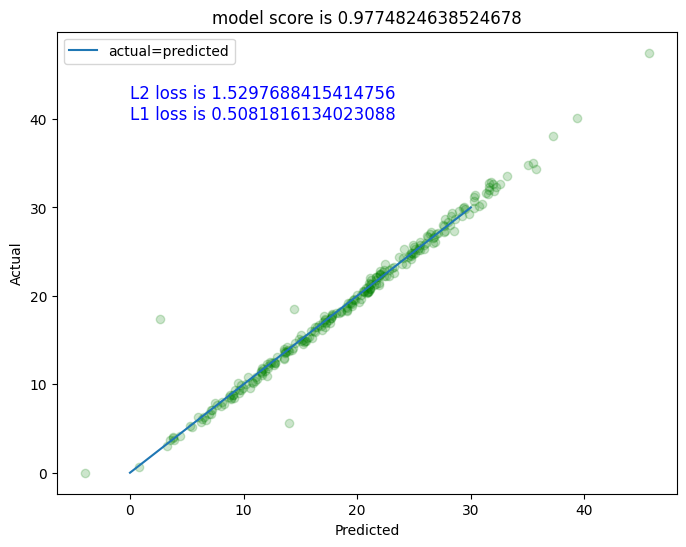

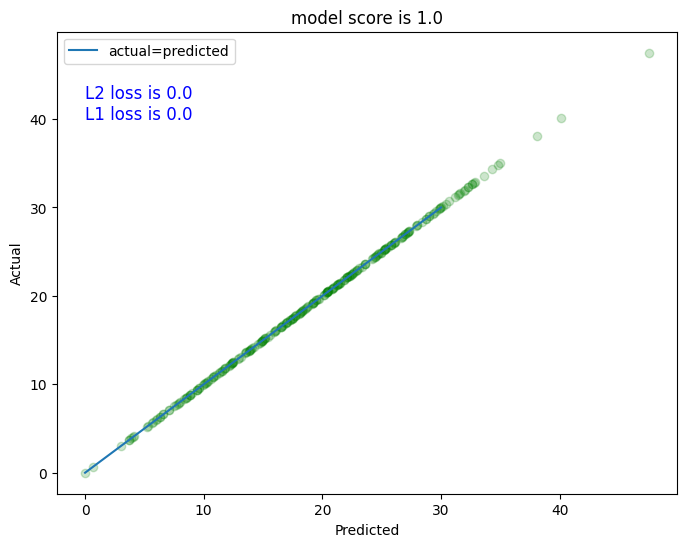

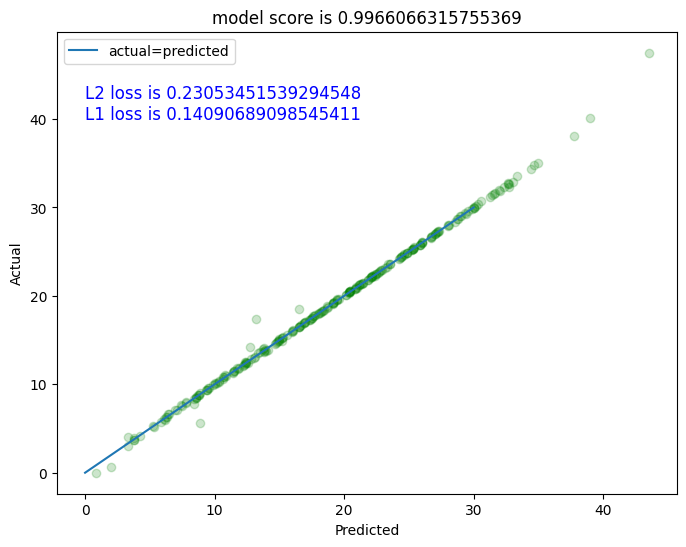

In [15]:
x=df.drop('target', axis=1)
y=df['target']

def plot_model(model):
    model_predictions= model.predict(x)
    model_score=model.score(x,y)
    error= model_predictions-y
    L_2=np.mean(error**2)
    L_1=np.mean(np.abs(error))
    
    plt.figure(figsize=(8, 6))
    plt.plot([0,30],[0,30], label = 'actual=predicted')
    plt.scatter(model_predictions, y, color='green', alpha=.2)
    plt.legend()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'model score is {model_score}')
    plt.text(0, 40, f'L2 loss is {L_2}\nL1 loss is {L_1}', fontsize=12, color='blue')

    

# Model 1

#model 1
from sklearn import linear_model
reg= linear_model.LinearRegression()
reg.fit(x,y)
plot_model(reg)

#model 2
import sklearn.tree
decision_tree_model= sklearn.tree.DecisionTreeRegressor()
decision_tree_model.fit(x,y)
plot_model(decision_tree_model)

#model 3
from sklearn.ensemble import RandomForestRegressor
random_forest= RandomForestRegressor()
random_forest.fit(x,y)
plot_model(random_forest)



YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=20)


def cross_val_l2( model):
    cv_results = cross_validate(model, x, y, cv=5, scoring='neg_mean_squared_error')
    return -cv_results['test_score'].mean() #,model.score(x,y)

def train_l2(model):
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return mean_squared_error(test_y, y_pred) 




print('linear regression L2 from cross-validation', cross_val_l2(reg))
print('linear regression L2 losses against whole dataset',train_l2(reg))

print('Decision tree regressor L2 from cross-validation', cross_val_l2(decision_tree_model))
print('Decision tree regressor L2 losses against whole dataset',train_l2(decision_tree_model))


print('Random forest regressor L2 from cross-validation', cross_val_l2(random_forest))
print('Random forest regressor L2 losses against whole dataset',train_l2(random_forest))



linear regression L2 from cross-validation 2.059457675934755
linear regression L2 losses against whole dataset 0.3144620931416379
Decision tree regressor L2 from cross-validation 3.144643427430401
Decision tree regressor L2 losses against whole dataset 2.22860047855427
Random forest regressor L2 from cross-validation 2.52772296842819
Random forest regressor L2 losses against whole dataset 0.25694691220022403


YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

Linear Regression - L2 loss: 0.3145
Decision Tree Regressor - L2 loss: 1.2660
Random Forest Regressor - L2 loss: 0.1543


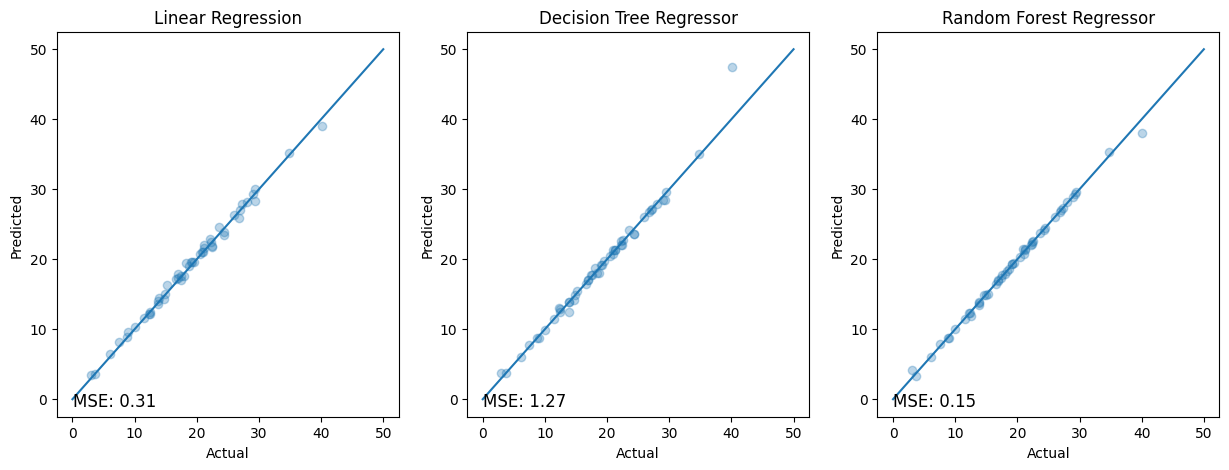

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),       
    ('regressor', LinearRegression())])


decision_tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),        
    ('regressor', sklearn.tree.DecisionTreeRegressor())])

random_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())])


models=[linear_pipeline, decision_tree_pipeline, random_forest_pipeline]
model_name= ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']

plt.figure(figsize=(15,5))
for i,(model, name) in enumerate(zip(models, model_name),1):
    model.fit(train_x, train_y)
    y_pred=model.predict(test_x)
    L2= mean_squared_error(test_y, y_pred)
    print(f'{name} - L2 loss: {L2:.4f}')
    #graphing
    plt.subplot(1,3,i)
    plt.scatter(test_y, y_pred, alpha=.3)
    x = np.linspace(0, 50, 100)
    y=x
    plt.plot(x,y)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    mse = mean_squared_error(test_y, y_pred)
    plt.text(0.05, 0.95, f'MSE: {mse:.2f}', fontsize=12, verticalalignment='top', color='black')
    plt.title(name)



The linear regression and random forest regressor preformed better than the models in problem 6 as their L2 loss decreased. The decision tree regressor didn't preform very well from problem 6 since L2 increased from zero. It seems that scaling the data did impact the result of the model and impoved it's accuracy.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

The suggestion could improve the model but has the risk of overfitting from high depth limits and using cross-validation can increase the likelyhood of overfittng which may not be optimal.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
#Best Model
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),       
    ('regressor', LinearRegression())])



I would consider the model above as the best model for this analysis. The model was able to predict values relatively well than the other models using MSE as the metric. From the Linear regression graph in problem 8, the model had an MSE of .31 and all points were really close to the y=x line (point on line would indicate a perfect prediction of the actual value). The reason for not choosing the random forest regressor from problem 8 is because it was almost to perfect. It seems that the model would be considered overfitted because almost all the points were predicted acturaly and may perfrom poorly with new data.